# **_Time Series Prediction_**
### __*Testing Different Methods of Time Series Prediction*__

<br>

### __*Import Libraries*__
### __*[DataTable](https://datatable.readthedocs.io/en/latest/start/quick-start.html)*__


In [1]:
# Datasets
# import numpy as np
# import pandas as pd
import datatable as dt
import matplotlib.pyplot as plt

# Fuzzy Time Series
from pyFTS.benchmarks import Tests
from pyFTS.models import chen
from pyFTS.partitioners import Grid

D:\GitHub\Time_Series\pyFTS\common\transformations\trend.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<br>

### __*Preparation of the [Weather](https://www.kaggle.com/datasets/ananthr1/weather-prediction) Data*__

In [2]:
# Show structure of dataset
weather_raw = dt.fread('data/seattle-weather.csv').to_pandas()
weather_raw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


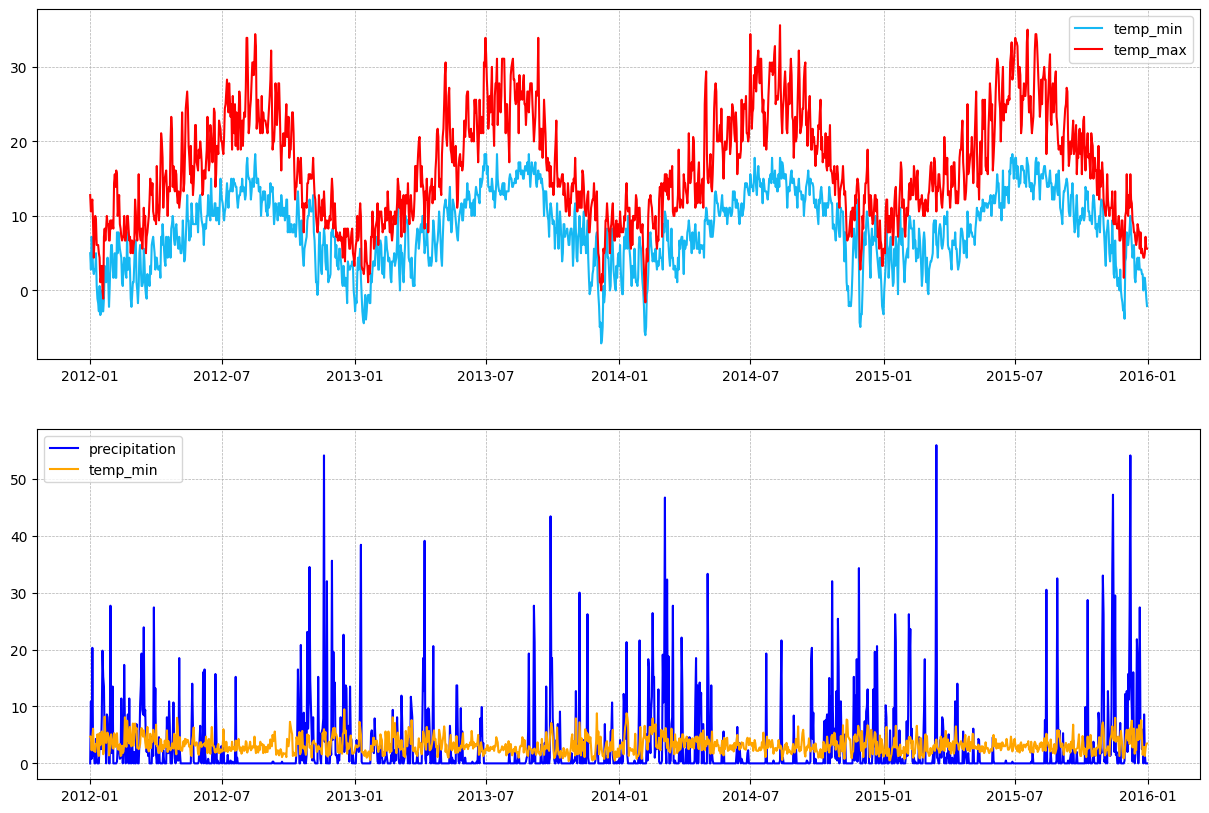

In [3]:
fig_weather, axs_weather = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

min_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_min'],
                                label='temp_min', color='#16b8f3')
max_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_max'],
                                label='temp_max', color='red')

precipitation, = axs_weather[1].plot(weather_raw['date'], weather_raw['precipitation'],
                                 label='precipitation', color='blue')
wind_plot, = axs_weather[1].plot(weather_raw['date'], weather_raw['wind'],
                                 label='temp_min', color='orange')

axs_weather[0].grid(linestyle='--', linewidth=0.5)
axs_weather[0].legend(handles=[min_plot, max_plot])
axs_weather[1].grid(linestyle='--', linewidth=0.5)
axs_weather[1].legend(handles=[precipitation, wind_plot])

In [4]:
# Split the dataset at
split_weather = 1350

<br>

### __*Testing the ConventionalFTS Model*__

In [5]:
# Load the dataset
data_ConvFTS = weather_raw['temp_min'].to_list()
# data_ConvFTS = weather_raw[['temp_min','temp_max']].to_numpy()

# Split the dataset into training and testing sets
train_data_ConvFTS = data_ConvFTS[:split_weather]
test_data_ConvFTS = data_ConvFTS[split_weather:split_weather+50]

# Create the Model
grid = Grid.GridPartitioner(data=train_data_ConvFTS, npart=250)
model = chen.ConventionalFTS(partitioner=grid)
model.fit(train_data_ConvFTS)

# print(model)

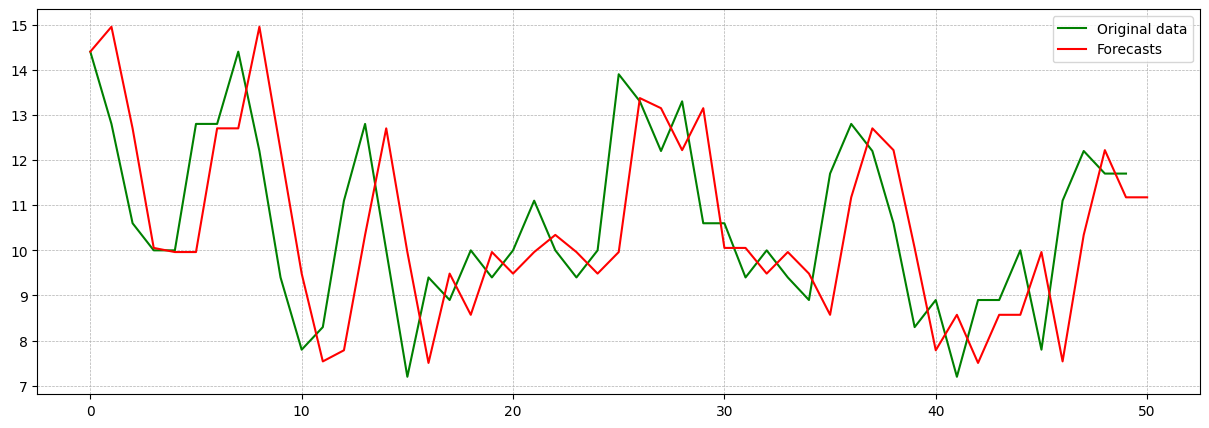

In [6]:
point_pred_ConvFTS = Tests.point_predictions(model, test_data_ConvFTS)

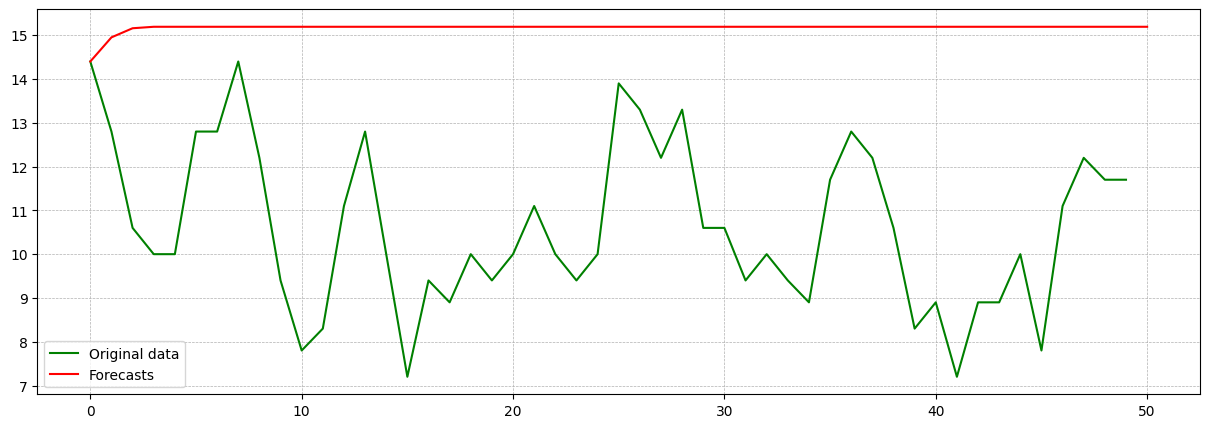

In [7]:
real_pred_ConvFTS = Tests.real_predictions(model, test_data_ConvFTS)

<br>

### __*Testing the High-OrderFTS Model*__